In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import shap

In [5]:
df_syn_bay = pd.read_csv('https://raw.githubusercontent.com/jennytsai32/Capstone/master/code/main_code/processed_data/2018_2022/CABG_synthetic_Bayesian.csv')
df_syn_bay = df_syn_bay.drop(['PUFYEAR'], axis=1)


random_state = 100
test_size = .25
target = 'OTHBLEED'
n_estimators = 300
learning_rate = 0.05

# build the model

X = df_syn_bay.drop([target], axis=1)
y = df_syn_bay[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# class_names = df[target].unique()
# feature_names = df.drop([target], axis=1).columns.to_list()

# creating the classifier object
model_gb_syn_bay_shap = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state,
                                        learning_rate=learning_rate)
model_gb_syn_bay_shap.fit(X_train, y_train)
#
# # calculate needed metrics
# y_pred_gb = Model_Predict(target, model_gb.model_name, model_gb.model, model_gb.X_test)
# accuracy_gb = Model_Accuracy(target, model_gb.model_name, random_state, model_gb.model, model_gb.y_test, y_pred_gb)
# mean_accuracy_gb = Model_Mean_Accuracy(target, model_gb.model_name, k_folds, random_state, model_gb.model, model_gb.X, model_gb.y)
# rmse_gb = Model_RMSE(target, model_gb.model_name, model_gb.y_test, y_pred_gb)
# f1_gb = Model_F1(target, model_gb.model_name, model_gb.y_test, y_pred_gb)
# auc_gb = Model_ROC_AUC_Score(target, model_gb.model_name, model_gb.model, model_gb.X_test, model_gb.y_test)
# # results table
# results_gb = Model_Results_Table(model_gb.model_name, model_gb.parameters, target, test_size, accuracy_gb, mean_accuracy_gb, k_folds, rmse_gb, f1_gb, auc_gb)

import shap

explainer_syn_bay = shap.Explainer(model_gb_syn_bay_shap, X_train)
shap_values_syn_bay = explainer_syn_bay(X_test)

In [19]:
df_syn_bay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OTHBLEED   1000 non-null   int64  
 1   SEX        1000 non-null   int64  
 2   RACE_NEW   1000 non-null   int64  
 3   INOUT      1000 non-null   int64  
 4   AGE        1000 non-null   float64
 5   ANESTHES   1000 non-null   int64  
 6   DIABETES   1000 non-null   int64  
 7   SMOKE      1000 non-null   int64  
 8   DYSPNEA    1000 non-null   int64  
 9   FNSTATUS2  1000 non-null   int64  
 10  VENTILAT   1000 non-null   int64  
 11  HXCOPD     1000 non-null   int64  
 12  ASCITES    1000 non-null   int64  
 13  HXCHF      1000 non-null   int64  
 14  HYPERMED   1000 non-null   int64  
 15  RENAFAIL   1000 non-null   int64  
 16  DIALYSIS   1000 non-null   int64  
 17  DISCANCR   1000 non-null   int64  
 18  WNDINF     1000 non-null   int64  
 19  STEROID    1000 non-null   int64  
 20  WTLOSS   

In [27]:
pd.set_option('display.max_columns', 50)
df_syn_bay.describe(include='all')

,OTHBLEED,SEX,RACE_NEW,INOUT,AGE,ANESTHES,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDIS,TRANSFUS,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,EMERGNCY,ASACLAS,OPTIME,TOTHLOS,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.161000,0.497000,3.671000,0.457000,-0.744631,0.937000,0.494000,0.598000,1.639000,1.596000,0.485000,0.081000,0.124000,0.440000,0.542000,0.51000,0.421000,0.517000,0.561000,0.519000,0.514000,0.52700,0.377000,-0.046552,6.124594,5.574618,3.151515,13.504142,13.944310,12.032840,6.602197,-0.690458,2.605678,1.509746,19.605777,0.313000,2.424000,4.125901,5.133551,2.375740
std,0.367715,0.500241,2.187589,0.498397,1.872440,0.830494,0.693141,0.490547,1.152392,1.077936,0.500025,0.272972,0.329746,0.496635,0.498482,0.50015,0.493967,0.499961,0.496513,0.499889,0.500054,0.49952,0.484877,3.361621,4.658393,4.167904,5.371792,9.076709,8.650947,7.923065,5.142071,2.570576,3.228649,2.186727,15.748871,0.463946,1.208174,4.219843,4.096120,2.832985
min,0.000000,0.000000,0.000000,0.000000,-4.387996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.097448,-1.523351,-0.994424,-5.896250,-1.116577,-0.893260,-2.229700,-2.539986,-5.767570,-3.193539,-2.035309,-5.655496,0.000000,0.000000,-3.096979,-1.659172,-2.818202
25%,0.000000,0.000000,2.000000,0.000000,-2.287639,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2.861913,1.063203,2.163490,-1.285420,5.412357,6.798829,4.833138,1.935898,-3.106047,-0.158423,-0.501826,3.865649,0.000000,1.000000,0.275673,1.349946,-0.054928
50%,0.000000,0.000000,3.000000,0.000000,-0.650639,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,-0.037221,7.377411,5.283070,2.572320,13.749299,13.221289,14.097972,7.156054,-0.865826,2.475202,1.464888,19.884104,0.000000,3.000000,4.137898,5.465722,2.656276
75%,0.000000,1.000000,6.000000,1.000000,0.852011,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.550093,8.942832,9.930423,7.096344,20.915283,21.094831,18.273632,11.392012,1.815562,5.173857,3.355711,31.062609,1.000000,3.000000,7.763820,8.880527,4.759248
max,1.000000,1.000000,7.000000,1.000000,2.458317,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,5.877503,15.818504,13.383853,12.901788,30.715809,28.735150,24.256714,14.886120,3.539613,8.659040,5.330488,46.368855,1.000000,5.000000,11.750291,11.831760,7.554664


In [23]:
df_syn_bay.describe().to_csv(r'C:\Users\wb576802\OneDrive - WBG\Documents\df.csv')

In [9]:
# calculate needed metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, mean_squared_error, f1_score
y_pred_proba = model_gb_syn_bay_shap.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

In [10]:
auc

0.9334062462024547

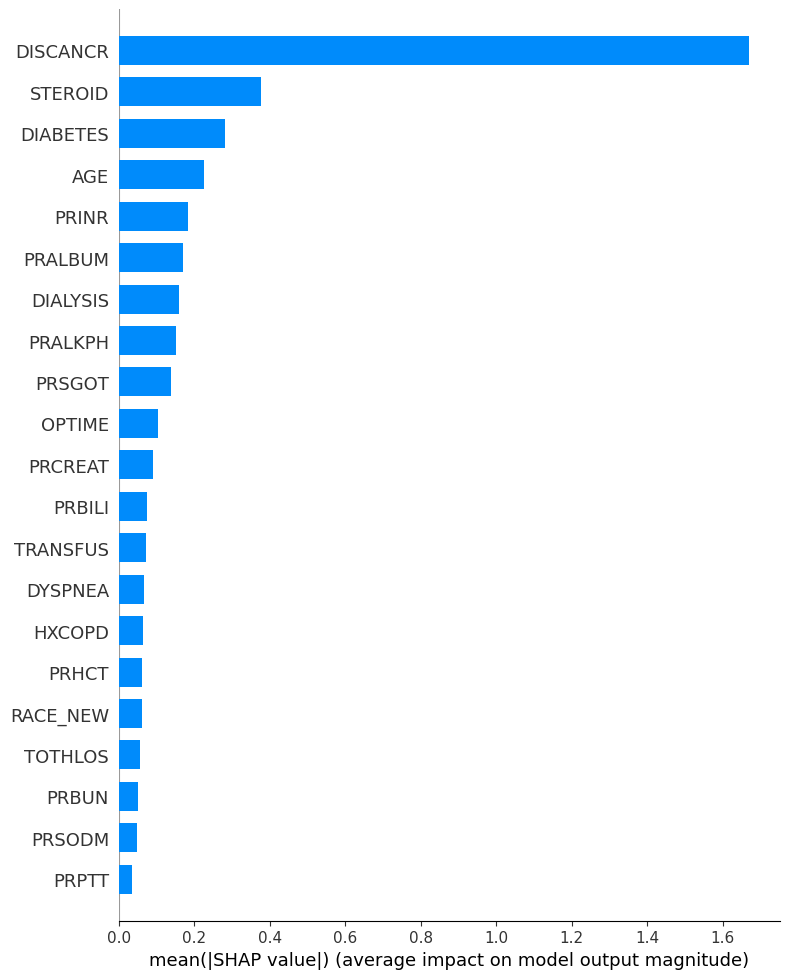

In [30]:
shap.summary_plot(shap_values_syn_bay, X_test, plot_type='bar', max_display=21)

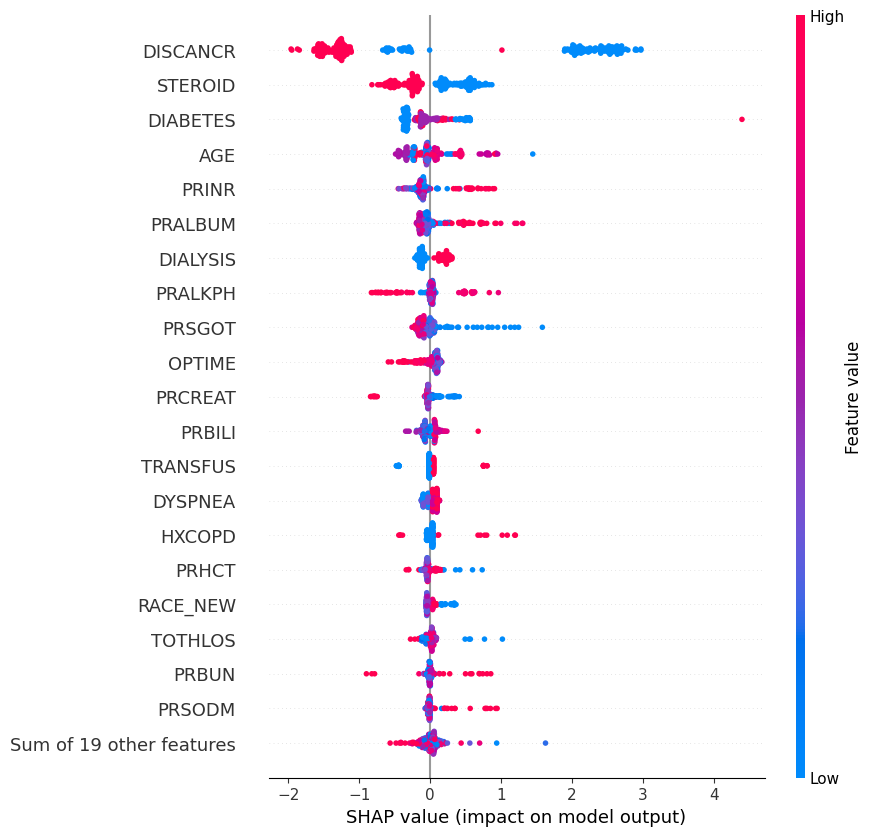

In [29]:
explainer_syn_bay = shap.Explainer(model_gb_syn_bay_shap, X_train)
shap_values_syn_bay = explainer_syn_bay(X_test)
# Beeswarm plot
shap.plots.beeswarm(shap_values_syn_bay, max_display=21)

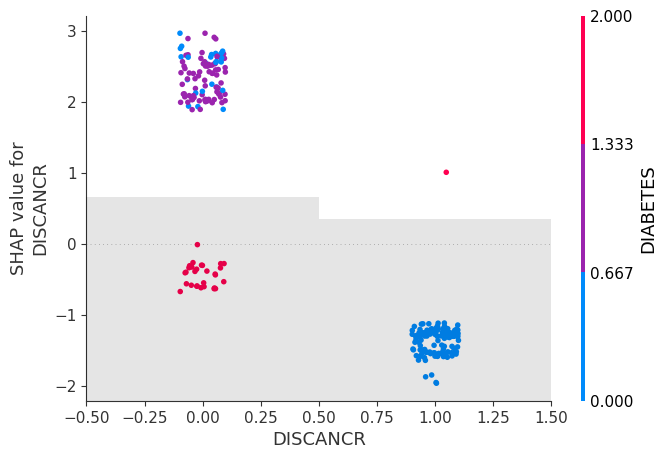

In [35]:
# Dependence plot - 1 feature
shap.plots.scatter(shap_values_syn_bay[:, 'DISCANCR'], color=shap_values_syn_bay)

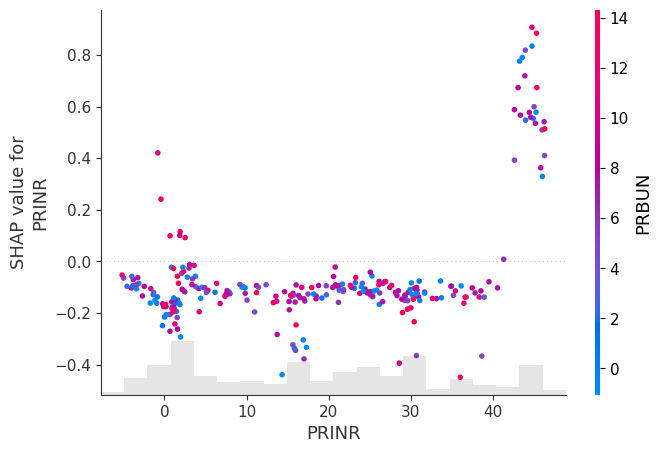

In [38]:
shap.plots.scatter(shap_values_syn_bay[:, 'PRINR'], color=shap_values_syn_bay)

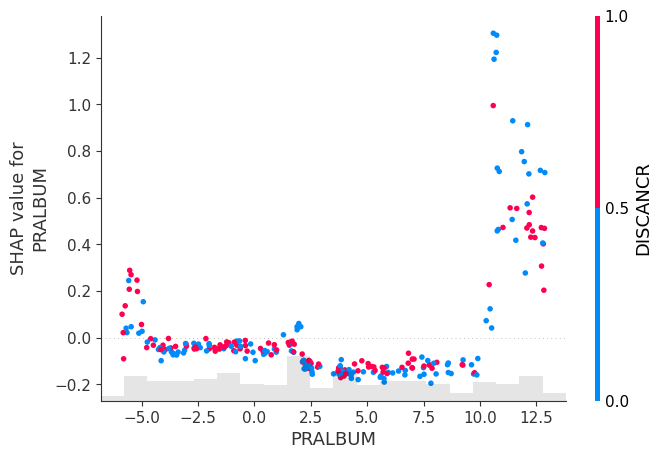

In [39]:
shap.plots.scatter(shap_values_syn_bay[:, 'PRALBUM'], color=shap_values_syn_bay)

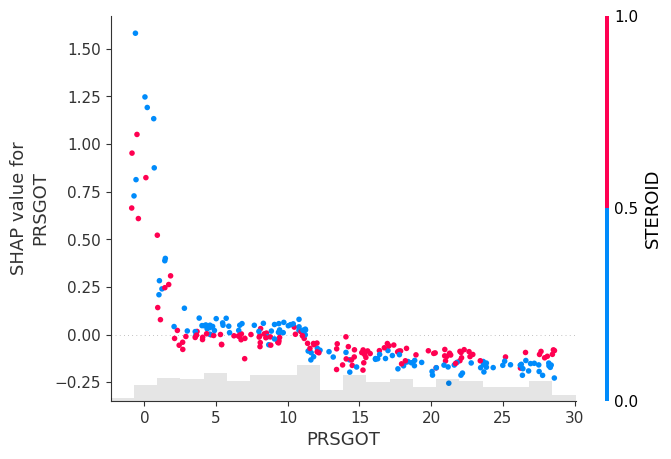

In [42]:
shap.plots.scatter(shap_values_syn_bay[:, 'PRSGOT'], color=shap_values_syn_bay)

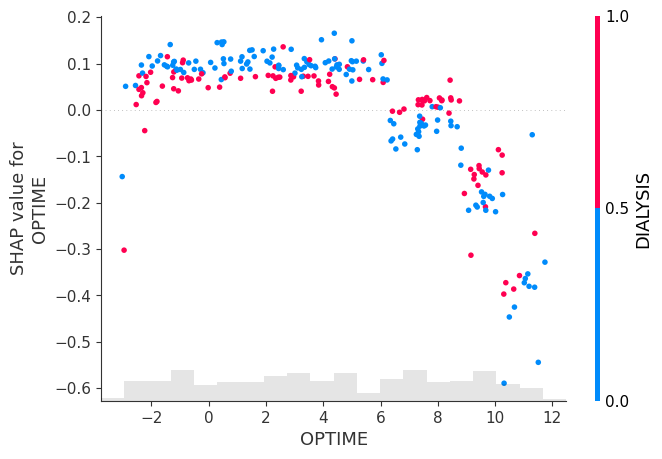

In [32]:
shap.plots.scatter(shap_values_syn_bay[:, "OPTIME"], color=shap_values_syn_bay)

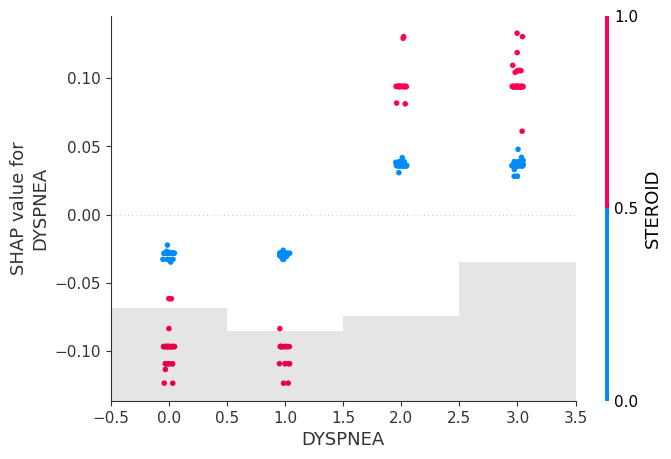

In [46]:
shap.plots.scatter(shap_values_syn_bay[:, 'DYSPNEA'], color=shap_values_syn_bay)

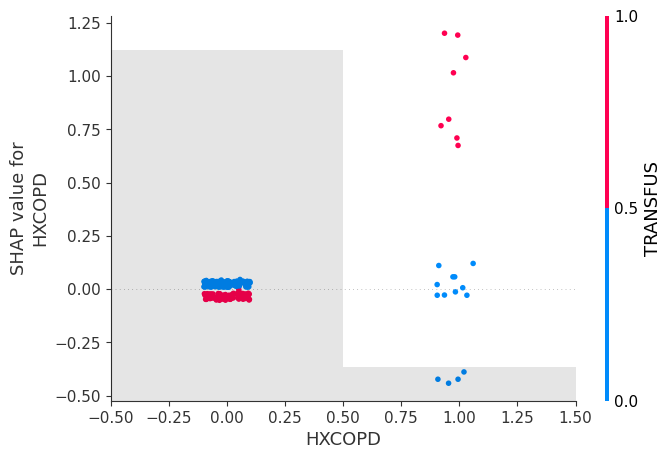

In [47]:
shap.plots.scatter(shap_values_syn_bay[:, 'HXCOPD'], color=shap_values_syn_bay)

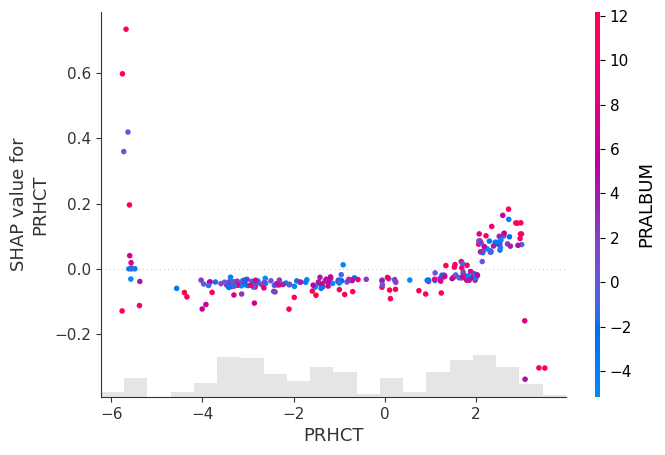

In [48]:
shap.plots.scatter(shap_values_syn_bay[:, 'PRHCT'], color=shap_values_syn_bay)

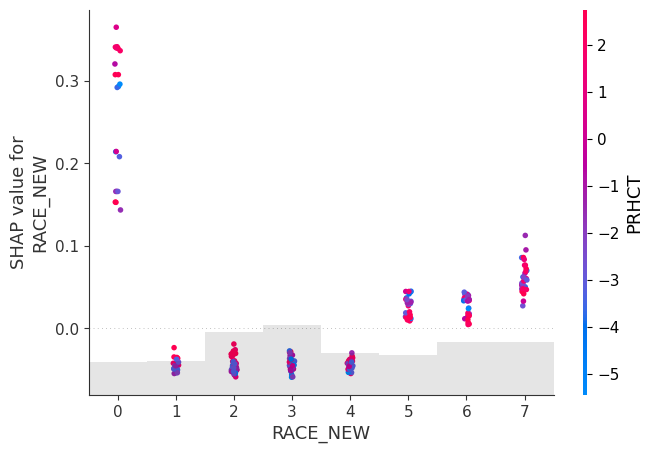

In [33]:
shap.plots.scatter(shap_values_syn_bay[:, "RACE_NEW"], color=shap_values_syn_bay)

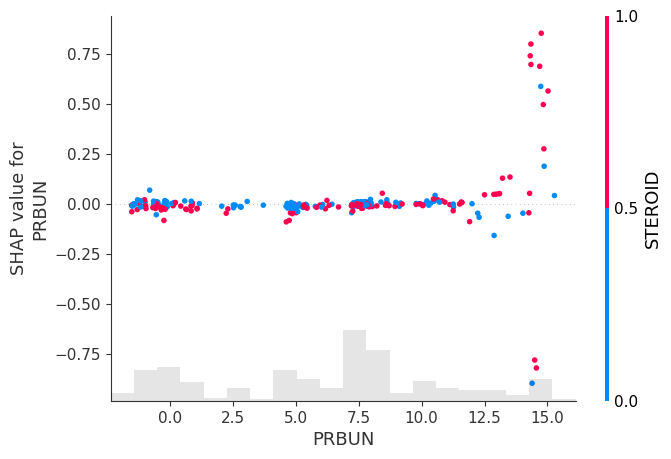

In [50]:
shap.plots.scatter(shap_values_syn_bay[:, "PRBUN"], color=shap_values_syn_bay)

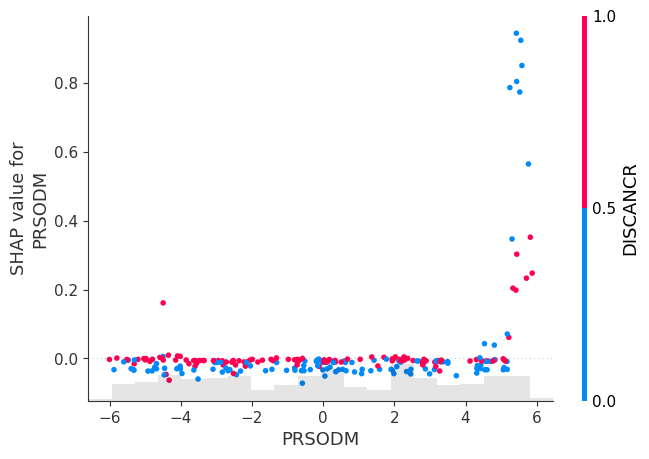

In [51]:
shap.plots.scatter(shap_values_syn_bay[:, "PRSODM"], color=shap_values_syn_bay)